# Calcul des montants empruntables en fonction d'hypothèses mensualité fixe et de conditions d'emprunt (taux/maturité)

## Capacité de remboursement mensuel

_(alternativement: à renseigner par l'utilisateur)_

In [7]:
mensualite=50.0

## Hypothèses d'emprunt

_(alternativement: à extraire d'une base de données recensant les prêts bancaires existants)_

In [8]:
taux=([0.0, 0.025, 0.05, 0.075]) # Hypothèses de taux
duree=([10, 15, 20, 25]) # Hypothèses de durée

## Définition du programme

In [9]:
# Importation des modules nécessaires aux simulations
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10.,12.)

# Initialisation
capital=np.zeros((4, 4)) 

# Calcul des résultats
for i in range(len(taux)):
    for j in range(len(duree)):
        capital[i, j]=np.pv(taux[i]/12, duree[j]*12, -mensualite)

## Visualisation des résultations de la simulation

In [10]:
print(np.round(capital,2))

[[  6000.     9000.    12000.    15000.  ]
 [  5303.92   7498.62   9435.69  11145.37]
 [  4714.07   6322.76   7576.27   8553.  ]
 [  4212.24   5393.67   6206.61   6765.98]]


## Visualisation graphique des résultations de la simulation

([<matplotlib.axis.XTick at 0x6207b30>,
 <a list of 4 Text xticklabel objects>)

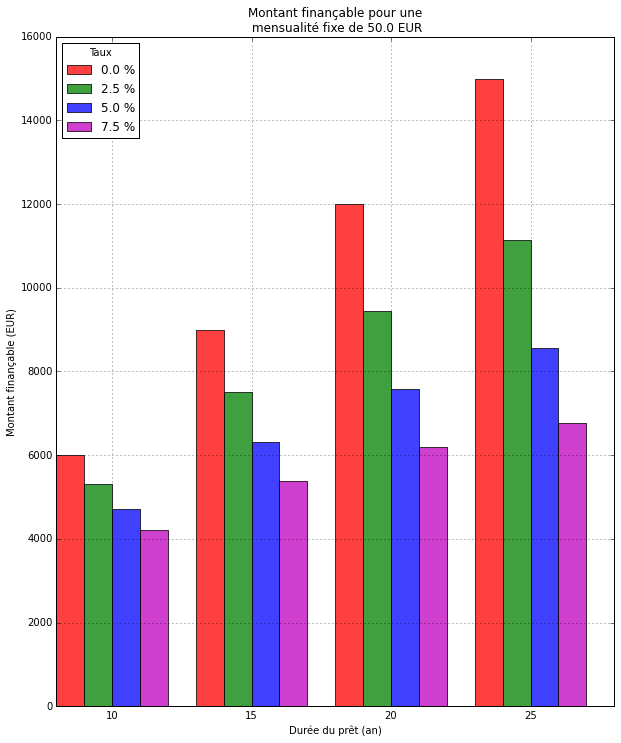

In [11]:
fig, ax = plt.subplots()

index = np.arange(len(duree))
width = 1.0 / (len(taux)+1)
rect=list()
taux_leg=list()
colors='rgbm'
for i in range(len(taux)):
    rect.append(ax.bar(index+i*width, capital[i], width, 
                       color=colors[i],
                       alpha=0.75))
    taux_leg.append(str(taux[i]*100)+' %')                       

plt.title("Montant finançable pour une\n mensualité fixe de {} EUR".format(mensualite))
plt.grid(color='k')
plt.xlabel('Durée du prêt (an)')
plt.ylabel('Montant finançable (EUR)')
plt.legend(taux_leg, title='Taux', loc='upper left')
plt.xticks(index + 2*width, duree)